In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# import data 
data = pd.read_csv('/Users/arthurrastelli/Desktop/Assignment/Assignment.csv')
data = data.rename(columns= {'duree': 'expo','nbrtotan': 'freq','nbrtotc': 'nclaims'})
data["sev"] = data['chargtot']/data['freq']
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEPH     163657 non-null  int64  
 1   CODPOSS   163657 non-null  int64  
 2   expo      163657 non-null  float64
 3   lnexpo    163657 non-null  float64
 4   nclaims   163657 non-null  int64  
 5   freq      163657 non-null  float64
 6   chargtot  163657 non-null  float64
 7   agecar    163657 non-null  object 
 8   sexp      163657 non-null  object 
 9   fuelc     163657 non-null  object 
 10  split     163657 non-null  object 
 11  usec      163657 non-null  object 
 12  fleetc    163657 non-null  object 
 13  sportc    163657 non-null  object 
 14  coverp    163657 non-null  object 
 15  powerc    163657 non-null  object 
 16  sev       18345 non-null   float64
dtypes: float64(5), int64(3), object(9)
memory usage: 21.2+ MB


,AGEPH,CODPOSS,expo,lnexpo,nclaims,freq,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc,sev
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110,NaN
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,7.264571
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66,NaN
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110,NaN
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66,NaN


In [4]:
KULbg =  "#116E8A"

In [5]:
def grouped(x):
    grouped = data.groupby(x).agg({
    'nclaims':'sum',
    'expo': 'sum',
    'chargtot': 'sum'
    })
    grouped['absph'] = data[x].value_counts()
    grouped['relph'] = grouped['absph']/grouped['absph'].sum()
    
    grouped['emp_freq'] = grouped['nclaims']/grouped['expo']
    grouped.reset_index(inplace=True)
    return   grouped

1.1 AGEPH

In [6]:
age = grouped('AGEPH')
age

,AGEPH,nclaims,expo,chargtot,absph,relph,emp_freq
0,17,0,1.693151,0.000000,2,0.000012,0.000000
1,18,5,4.890411,9222.457170,17,0.000104,1.022409
2,19,28,93.021918,50489.862394,116,0.000709,0.301004
3,20,113,342.284932,158953.467906,393,0.002401,0.330134
4,21,166,600.219178,619270.027935,704,0.004302,0.276566
...,...,...,...,...,...,...,...
74,91,1,11.827397,1471.793435,12,0.000073,0.084549
75,92,4,13.232877,4743.640911,16,0.000098,0.302277
76,93,0,7.167123,0.000000,9,0.000055,0.000000
77,94,0,3.000000,0.000000,3,0.000018,0.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


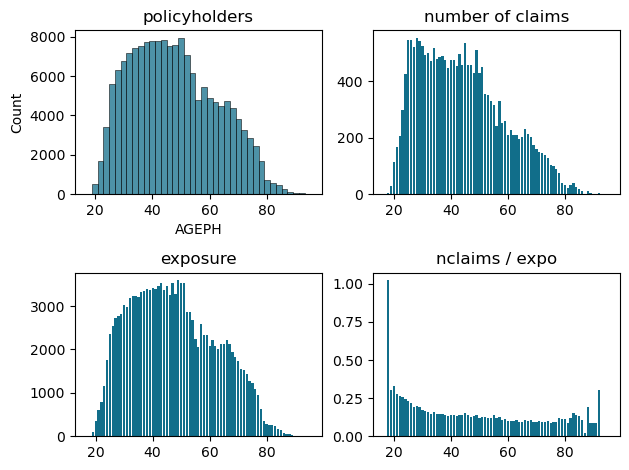

In [7]:
plt.subplot(2,2,1)
sns.histplot(data=data, x='AGEPH', stat='count', binwidth=2, color=KULbg)
plt.title('policyholders')

plt.subplot(2,2,2)
plt.bar(data=age, x='AGEPH', height='nclaims',color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(data=age, x='AGEPH', height='expo',color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(data=age, x='AGEPH', height='emp_freq', color=KULbg)
plt.title('nclaims / expo')

plt.tight_layout()

1.2 CODPOSS

In [8]:
def categorize_postal_code(code):
    if 1000 <= code <= 1299:
        return 'BHG'
    elif 1300 <= code <= 1499:
        return 'WB'
    elif 1500 <= code <= 1999 or 3000 <= code <= 3499:
        return 'VB'
    elif 2000 <= code <= 2999:
        return 'ANT'
    elif 3500 <= code <= 3999:
        return 'LIM'
    elif 4000 <= code <= 4999:
        return 'LUI'
    elif 5000 <= code <= 5999:
        return 'NAM'
    elif 6000 <= code <= 6599 or 7000 <= code <= 7999:
        return 'HEN'
    elif 6600 <= code <= 6999:
        return 'LUX'
    elif 8000 <= code <= 8999:
        return 'WV'
    elif 9000 <= code <= 9999:
        return 'OV'
    else:
        return 'Unknown'
    
data['region'] = data['CODPOSS'].apply(categorize_postal_code)
data

,AGEPH,CODPOSS,expo,lnexpo,nclaims,freq,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc,sev,region
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110,NaN,BHG
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,7.264571,BHG
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66,NaN,BHG
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110,NaN,BHG
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66,NaN,BHG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163652,50,9960,1.000000,0.000000,0,0.000000,0.000000,2-5,Male,Petrol,Once,Private,No,No,MTPL+,<66,NaN,OV
163653,86,9960,1.000000,0.000000,0,0.000000,0.000000,6-10,Male,Petrol,Once,Private,No,No,MTPL,<66,NaN,OV
163654,64,9960,1.000000,0.000000,0,0.000000,0.000000,2-5,Male,Petrol,Twice,Private,No,No,MTPL,<66,NaN,OV
163655,58,9970,1.000000,0.000000,1,1.000000,3177.994988,>10,Male,Petrol,Once,Private,Yes,No,MTPL,<66,3177.994988,OV


In [9]:
codposs = grouped('region')
codposs = codposs.sort_values(by='nclaims',ascending=False)
codposs

,region,nclaims,expo,chargtot,absph,relph,emp_freq
2,HEN,4475,34161.043836,8.280793e+06,37771,0.230794,0.130997
4,LUI,2705,19135.750685,3.340034e+06,21809,0.133260,0.141358
0,ANT,2330,17771.123288,3.667861e+06,19784,0.120887,0.131112
7,OV,2228,15561.312329,3.838862e+06,17121,0.104615,0.143176
1,BHG,1925,8188.019178,2.300166e+06,9901,0.060498,0.235100
10,WV,1918,14512.367123,3.724288e+06,15946,0.097435,0.132163
8,VB,1597,11989.178082,2.189970e+06,13747,0.083999,0.133203
6,NAM,944,7789.183562,1.715293e+06,8795,0.053740,0.121194
3,LIM,935,7315.150685,1.736757e+06,8151,0.049805,0.127817
9,WB,854,5684.909589,1.551399e+06,6680,0.040817,0.150222


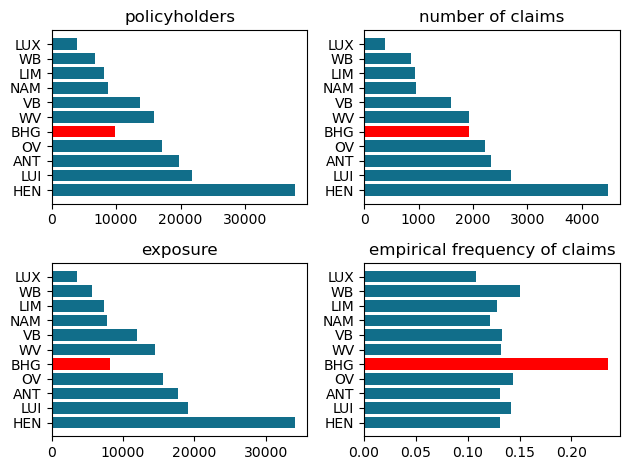

In [10]:
colors = [KULbg, KULbg, KULbg,KULbg, 'red',KULbg,KULbg,KULbg,KULbg,KULbg,KULbg,]
plt.subplot(2,2,1)
plt.barh(codposs['region'],codposs['absph'],color=colors)
plt.title('policyholders')

plt.subplot(2,2,2)
plt.barh(codposs['region'],codposs['nclaims'],color=colors)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.barh(codposs['region'],codposs['expo'],color=colors)
plt.title('exposure')

plt.subplot(2,2,4)
plt.barh(codposs['region'],codposs['emp_freq'],color=colors)
plt.title('empirical frequency of claims')

plt.tight_layout()
plt.show()

1.3 AGECAR

In [11]:
agecar = grouped('agecar')
agecar

,agecar,nclaims,expo,chargtot,absph,relph,emp_freq
0,0-1,1115,6570.191781,1.975692e+06,7766,0.047453,0.169706
1,2-5,6029,46189.060274,8.671438e+06,51559,0.315043,0.130529
2,6-10,8453,60555.106849,1.328777e+07,67151,0.410315,0.139592
3,>10,4693,32305.369863,8.976585e+06,37181,0.227189,0.145270


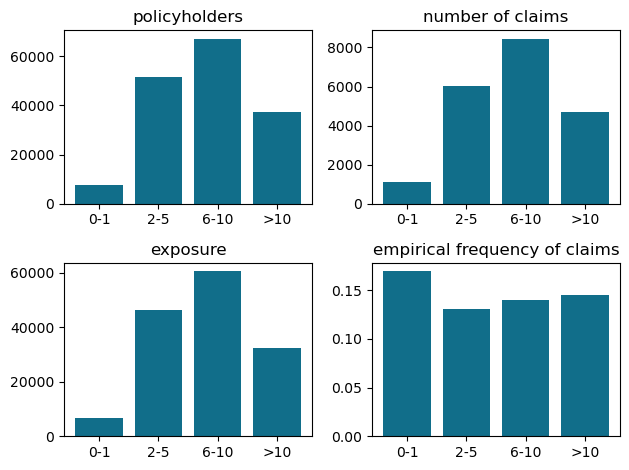

In [12]:
plt.subplot(2,2,1)
plt.bar(agecar['agecar'], agecar['absph'],color=KULbg)
plt.title('policyholders')

plt.subplot(2,2,2)
plt.bar(agecar['agecar'], agecar['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(agecar['agecar'], agecar['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(agecar['agecar'], agecar['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.3 SEXP

In [33]:
sexp = grouped('sexp')
sexp

,sexp,nclaims,expo,chargtot,absph,relph,emp_freq
0,Female,5640,38001.589041,1.085424e+07,43223,0.264107,0.148415
1,Male,14650,107618.139726,2.205724e+07,120434,0.735893,0.136129


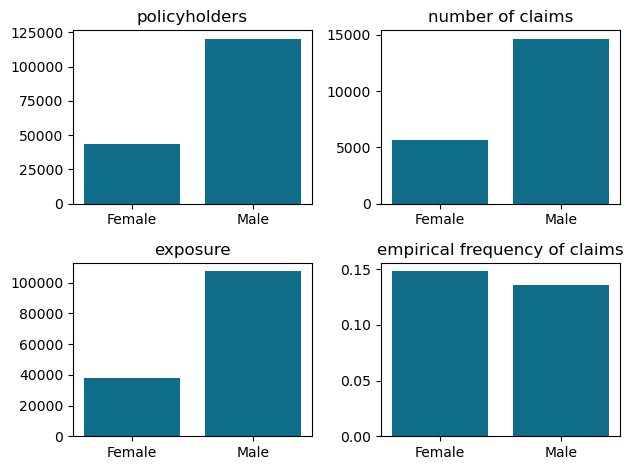

In [35]:
plt.subplot(2,2,1)
plt.bar(sexp['sexp'], sexp['absph'],color=KULbg)
plt.title('policyholders')

plt.subplot(2,2,2)
plt.bar(sexp['sexp'], sexp['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(sexp['sexp'], sexp['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(sexp['sexp'], sexp['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.4 FUELC

In [13]:
fuelc = grouped('fuelc')
fuelc

,fuelc,nclaims,expo,chargtot,absph,relph,emp_freq
0,Gasoil,7040,44613.397260,1.008824e+07,50447,0.308248,0.15780
1,Petrol,13250,101006.331507,2.282324e+07,113210,0.691752,0.13118


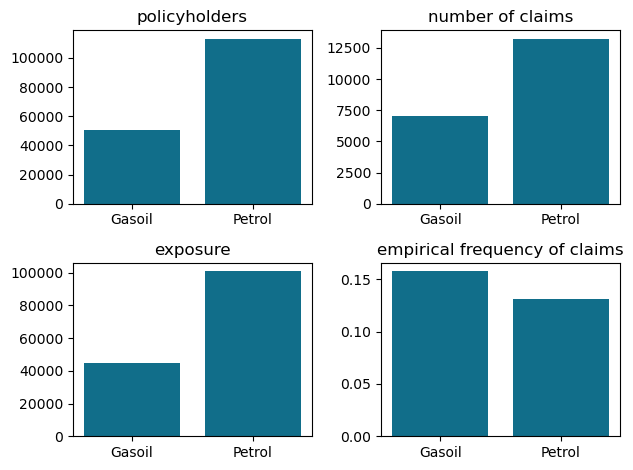

In [14]:
plt.subplot(2,2,1)
plt.bar(fuelc['fuelc'], fuelc['absph'],color=KULbg)
plt.title('policyholders')

plt.subplot(2,2,2)
plt.bar(fuelc['fuelc'], fuelc['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(fuelc['fuelc'], fuelc['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(fuelc['fuelc'], fuelc['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.4 AGECAR

In [15]:
agecar = grouped('agecar')
agecar

,agecar,nclaims,expo,chargtot,absph,relph,emp_freq
0,0-1,1115,6570.191781,1.975692e+06,7766,0.047453,0.169706
1,2-5,6029,46189.060274,8.671438e+06,51559,0.315043,0.130529
2,6-10,8453,60555.106849,1.328777e+07,67151,0.410315,0.139592
3,>10,4693,32305.369863,8.976585e+06,37181,0.227189,0.145270


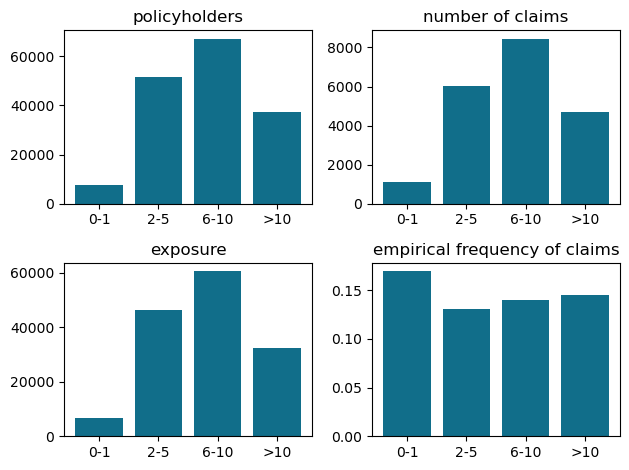

In [16]:
plt.subplot(2,2,1)
plt.bar(agecar['agecar'], agecar['absph'],color=KULbg)
plt.title('policyholders')

plt.subplot(2,2,2)
plt.bar(agecar['agecar'], agecar['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(agecar['agecar'], agecar['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(agecar['agecar'], agecar['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.5 COVERP

In [17]:
coverp = grouped('coverp')
coverp

,coverp,nclaims,expo,chargtot,absph,relph,emp_freq
0,MTPL,12261,84012.597260,2.111275e+07,95409,0.582981,0.145942
1,MTPL+,5342,41759.449315,6.867398e+06,46073,0.281522,0.127923
2,MTPL+++,2687,19847.682192,4.931330e+06,22175,0.135497,0.135381


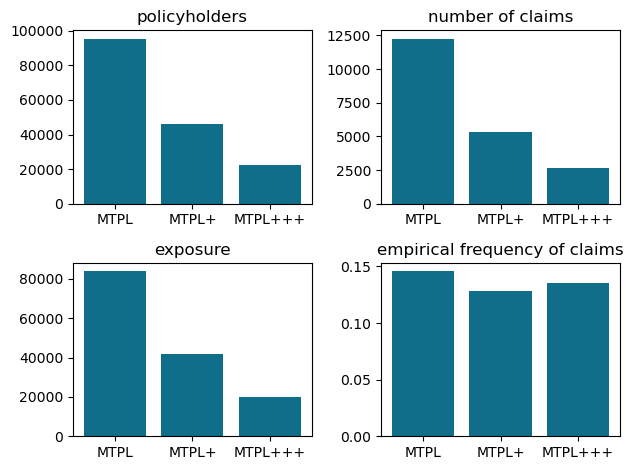

In [18]:
plt.subplot(2,2,1)
plt.bar(coverp['coverp'], coverp['absph'],color=KULbg)
plt.title('policyholders')

plt.subplot(2,2,2)
plt.bar(coverp['coverp'], coverp['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(coverp['coverp'], coverp['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(coverp['coverp'], coverp['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.5 POWERC

In [19]:
powerc = grouped('powerc')
powerc

,powerc,nclaims,expo,chargtot,absph,relph,emp_freq
0,66-110,5361,37340.164384,9.050775e+06,42188,0.257783,0.143572
1,<66,14700,106846.843836,2.332403e+07,119809,0.732074,0.137580
2,>110,229,1432.720548,5.366778e+05,1660,0.010143,0.159836


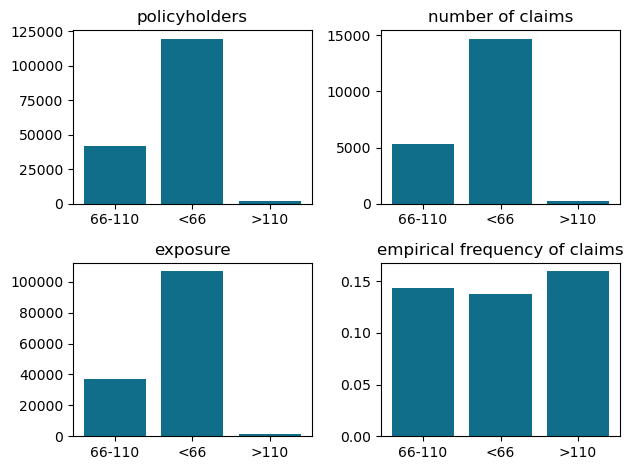

In [20]:
plt.subplot(2,2,1)
plt.bar(powerc['powerc'], powerc['absph'],color=KULbg)
plt.title('policyholders')

plt.subplot(2,2,2)
plt.bar(powerc['powerc'], powerc['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(powerc['powerc'], powerc['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(powerc['powerc'], powerc['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.6 FLEET C

In [21]:
fleetc = grouped('fleetc')
fleetc

,fleetc,nclaims,expo,chargtot,absph,relph,emp_freq
0,No,19728,140611.580822,3.220790e+07,158428,0.968049,0.140301
1,Yes,562,5008.147945,7.035867e+05,5229,0.031951,0.112217


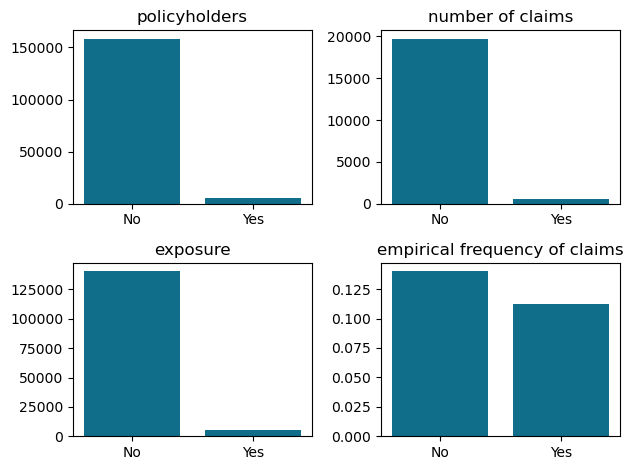

In [22]:
plt.subplot(2,2,1)
plt.bar(fleetc['fleetc'], fleetc['absph'],color=KULbg)
plt.title('policyholders')

plt.subplot(2,2,2)
plt.bar(fleetc['fleetc'], fleetc['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(fleetc['fleetc'], fleetc['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(fleetc['fleetc'], fleetc['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.7 USEC

In [23]:
usec = grouped('usec')
usec

,usec,nclaims,expo,chargtot,absph,relph,emp_freq
0,Private,19290,138394.630137,3.146557e+07,155652,0.951087,0.139384
1,Professional,1000,7225.098630,1.445910e+06,8005,0.048913,0.138406


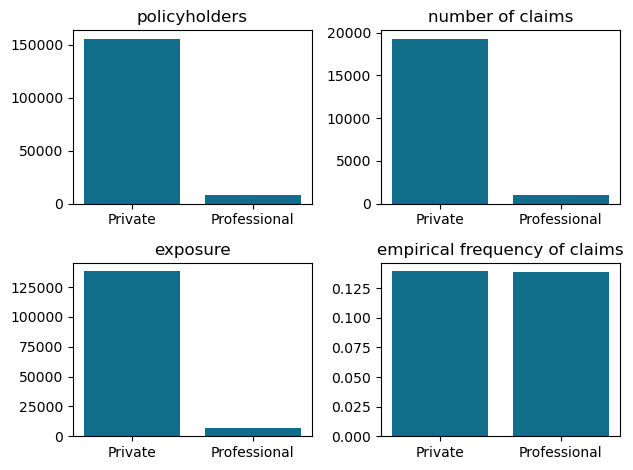

In [25]:
plt.subplot(2,2,1)
plt.bar(usec['usec'], usec['absph'],color=KULbg)
plt.title('policyholders')

plt.subplot(2,2,2)
plt.bar(usec['usec'], usec['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(usec['usec'], usec['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(usec['usec'], usec['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.8 SPORTC

In [26]:
sportc = grouped('sportc')
sportc

,sportc,nclaims,expo,chargtot,absph,relph,emp_freq
0,No,20061,144294.778082,3.255415e+07,162145,0.990761,0.139028
1,Yes,229,1324.950685,3.573275e+05,1512,0.009239,0.172837


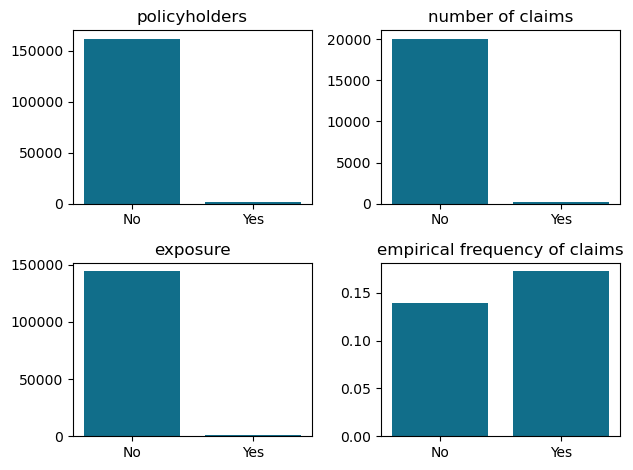

In [27]:
plt.subplot(2,2,1)
plt.bar(sportc['sportc'], sportc['absph'],color=KULbg)
plt.title('policyholders')

plt.subplot(2,2,2)
plt.bar(sportc['sportc'], sportc['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(sportc['sportc'], sportc['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(sportc['sportc'], sportc['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.9 SPLIT

In [36]:
split = grouped('split')
split

,split,nclaims,expo,chargtot,absph,relph,emp_freq
0,Monthly,3100,17446.791781,6.590658e+06,23599,0.144198,0.177683
1,Once,8818,75070.876712,1.474234e+07,81479,0.497864,0.117462
2,Thrice,2207,11105.052055,3.479737e+06,12618,0.077100,0.198738
3,Twice,6165,41997.008219,8.098743e+06,45961,0.280837,0.146796


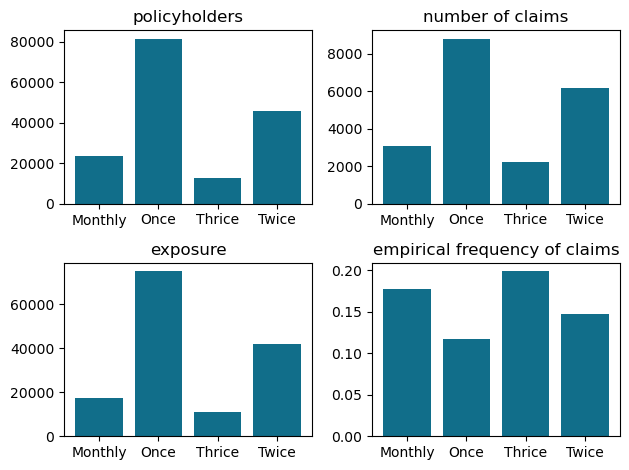

In [37]:
plt.subplot(2,2,1)
plt.bar(split['split'], split['absph'],color=KULbg)
plt.title('policyholders')

plt.subplot(2,2,2)
plt.bar(split['split'], split['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(split['split'], split['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(split['split'], split['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

FREQUENCY AND SEVERITY

In [29]:
claim_freq=data.groupby("nclaims").agg(tot_obs = ('nclaims', 'count'), tot_expo = ('expo', 'sum')).reset_index()
claim_freq

,nclaims,tot_obs,tot_expo
0,0,145312,128595.947945
1,1,16602,15410.320548
2,2,1562,1447.301370
3,3,162,150.454795
4,4,17,14.328767
5,5,2,1.375342


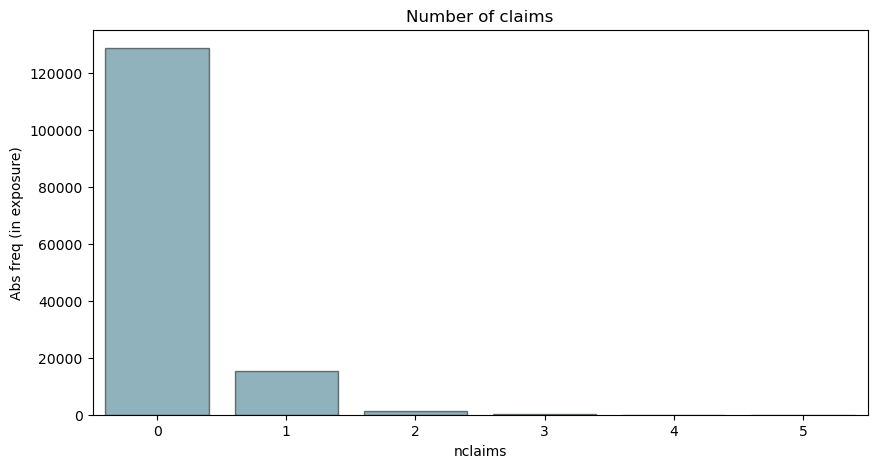

In [30]:
plt.figure(figsize = (10, 5))
sns.barplot(data = claim_freq, x = "nclaims", y = "tot_expo", color = KULbg, alpha = 0.5, edgecolor = 'black', linewidth = 1)
plt.ylabel("Abs freq (in exposure)")
plt.xlabel("nclaims")
plt.title('Number of claims')
plt.show()

In [31]:
pos_sev = data[data['sev']>0]
pos_sev.head()

,AGEPH,CODPOSS,expo,lnexpo,nclaims,freq,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc,sev,region
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,7.264571,BHG
12,72,1050,1.000000,0.000000,1,1.000000,1426.379342,2-5,Female,Petrol,Once,Private,No,No,MTPL+++,66-110,1426.379342,BHG
15,28,1060,0.956164,-0.044825,2,2.091691,1576.354924,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,753.627217,BHG
20,52,1070,0.452055,-0.793952,3,6.636364,8885.396345,6-10,Female,Petrol,Monthly,Private,No,Yes,MTPL,>110,1338.895340,BHG
22,56,1082,1.000000,0.000000,1,1.000000,619.733812,0-1,Female,Petrol,Once,Private,No,No,MTPL+,66-110,619.733812,BHG


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


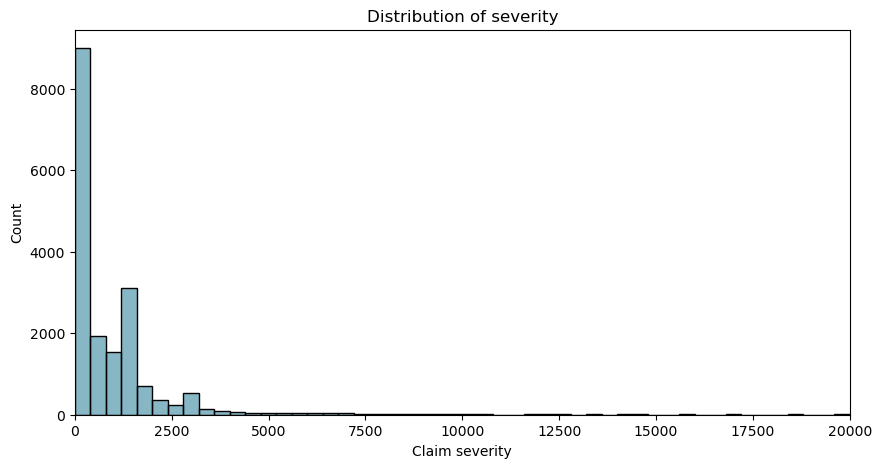

In [32]:
plt.figure(figsize = (10,5))
sns.histplot(data = pos_sev, x = "sev", stat = 'count', color = KULbg, alpha = 0.5, bins = 50, binrange = [0, 20000], edgecolor = 'black', linewidth = 1)
plt.xlabel("Claim severity")
plt.xlim(0, 20000)
plt.title('Distribution of severity')
plt.show()